<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/09-decision-trees/01_app_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##App Recommendation

Recommendation systems are one of the most common and exciting applications in machine learning. 

Ever wonder how Netflix recommends movies, YouTube guesses which videos you may watch, or Amazon shows you products you might be interested in buying? 

These are all examples of recommendation systems. 

One simple and interesting way to see recommendation problems
is to consider them classification problems. 

Let’s start with an easy example: our very own
app-recommendation system using decision trees.

##Setup

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

random.seed(0)

##Problem statement

Let’s say we want to build a system that recommends to users which app to download among
the following options. 

We have the following three apps in our store.
* **Atom Count**: an app that counts the number of atoms in your body
* **Beehive Finder**: an app that maps your location and finds the closest beehives
* **Check Mate Mate**: an app for finding Australian chess players

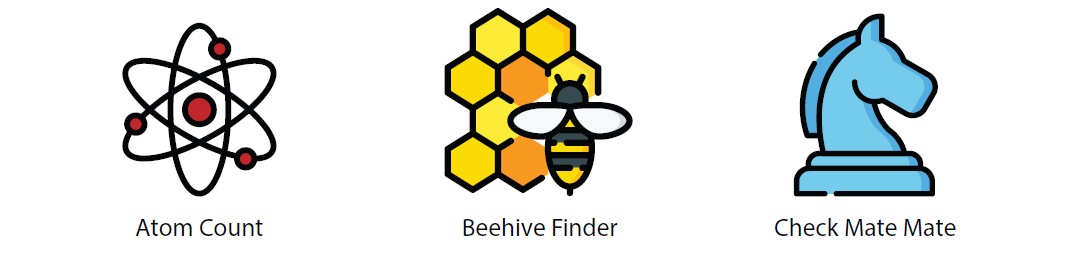

##Dataset

The training data is a table with the platform used by the user (iPhone or Android), their age, and
the app they have downloaded (in real life there are many more platforms, but for simplicity we’ll
assume that these are the only two options). 

Our table contains six people.

In [2]:
app_dataset = pd.DataFrame({
  "Platform": ["iPhone","iPhone","Android","iPhone","Android","Android"],
  "Age": [15, 25, 32, 35, 12, 14],
  "App": ["Atom Count", "Check Mate Mate", "Beehive Finder", "Check Mate Mate", "Atom Count", "Atom Count"]
})

app_dataset

,Platform,Age,App
0,iPhone,15,Atom Count
1,iPhone,25,Check Mate Mate
2,Android,32,Beehive Finder
3,iPhone,35,Check Mate Mate
4,Android,12,Atom Count
5,Android,14,Atom Count


##Categorical feature

Let’s consider age as a categorical feature.

In [3]:
app_dataset_one_hot = pd.DataFrame({
  "Platform_iPhone": [1, 1, 0, 1, 0, 0],
  "Platform_Android": [0, 0, 1, 0, 1, 1],
  "Age_Young": [1,0,0,0,1,1],
  "Age_Adult": [0,1,1,1,0,0],
  "App_Atom_Count": [1,0,0,0,1,1],
  "App_Beehive_Finder": [0,0,1,0,0,0],
  "App_Check_Mate_Mate": [0,1,0,1,0,0]
})

app_dataset_one_hot

,Platform_iPhone,Platform_Android,Age_Young,Age_Adult,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


Let's create feature and label.

In [4]:
X = app_dataset_one_hot[["Platform_iPhone", "Platform_Android", "Age_Adult", "Age_Young"]]
y = app_dataset_one_hot[["App_Atom_Count", "App_Beehive_Finder", "App_Check_Mate_Mate"]]

Let's build model.

In [5]:
dtc = DecisionTreeClassifier()
dtc.fit(X, y)
dtc.score(X, y)

1.0

Let's plot the decision tree.

[Text(0.4, 0.8333333333333334, 'X[2] <= 0.5\ngini = 0.407\nsamples = 6\nvalue = [[3, 3]\n[5, 1]\n[4, 2]]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]\n[3, 0]]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\ngini = 0.296\nsamples = 3\nvalue = [[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]')]

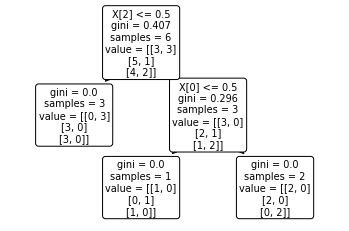

In [6]:
tree.plot_tree(dtc, rounded=True)

##Numerical feature

Let’s consider age as a numerical feature.

In [9]:
app_dataset = pd.DataFrame({
  "Platform_iPhone": [1, 1, 0, 1, 0, 0],
  "Platform_Android": [0, 0, 1, 0, 1, 1],
  "Age": [15, 25, 32, 35, 12, 14],
  "App": ["Atom Count", "Check Mate Mate", "Beehive Finder", "Check Mate Mate", "Atom Count", "Atom Count"]
})

app_dataset

,Platform_iPhone,Platform_Android,Age,App
0,1,0,15,Atom Count
1,1,0,25,Check Mate Mate
2,0,1,32,Beehive Finder
3,1,0,35,Check Mate Mate
4,0,1,12,Atom Count
5,0,1,14,Atom Count


Now let’s create the feature.

In [10]:
features = app_dataset[["Age", "Platform_iPhone", "Platform_Android"]]
features

,Age,Platform_iPhone,Platform_Android
0,15,1,0
1,25,1,0
2,32,0,1
3,35,1,0
4,12,0,1
5,14,0,1


In [11]:
labels = app_dataset["App"]
labels 

0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object

Let's build the decision tree model.

In [12]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

Let's plot the decision tree.

[Text(0.4, 0.8333333333333334, 'X[0] <= 20.0\ngini = 0.611\nsamples = 6\nvalue = [3, 1, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

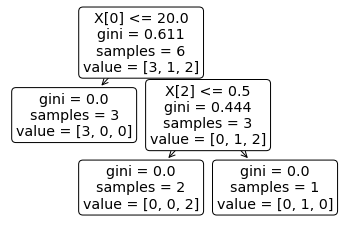

In [13]:
tree.plot_tree(app_model, rounded=True)